<a href="https://colab.research.google.com/github/saqib-rgb/ML-With-Pytorch/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Classification

Classification is a problem in which we say that whether one thing is something or not out of two options ins case of binary
and many options in case of multiple.options

# Architecture of classificatio problem
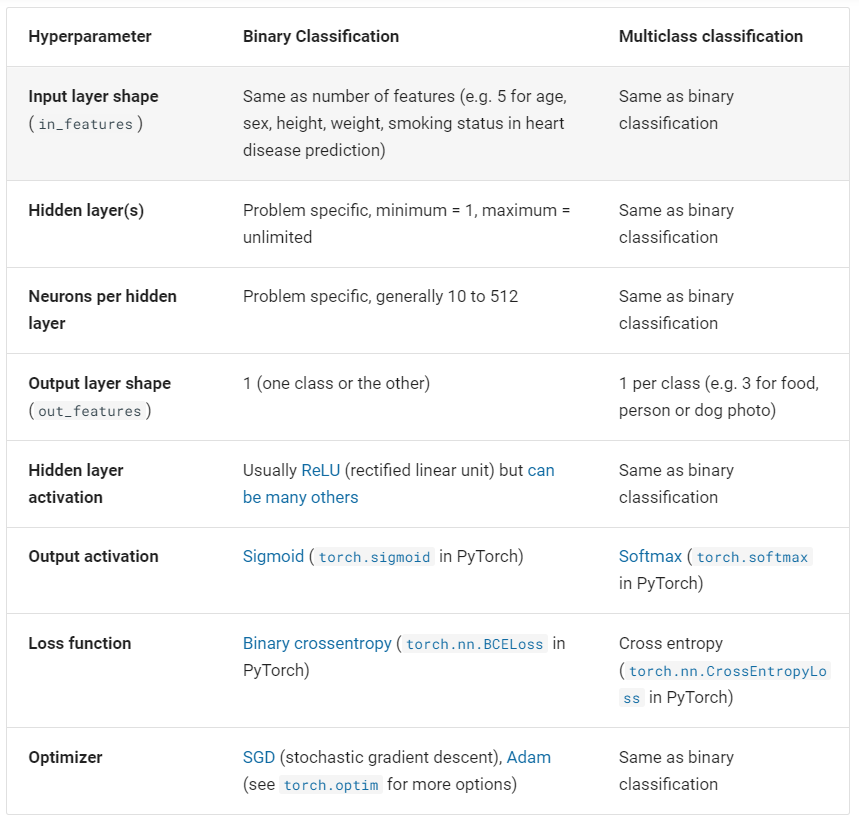

In [1]:
## 1. Make Classification data and get it ready
import sklearn

In [2]:
from sklearn.datasets import make_circles
# Make 1000 samples
n_samples=1000
# Create circles
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f'first five samples of X:{X[:5]}')
print(f'first five samples of y:{y[:5]}')

first five samples of X:[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first five samples of y:[1 1 1 1 0]


In [5]:
# Make a dataframe of circle data
import pandas as pd
circles=pd.DataFrame({'X1':X[:,0],
                      'X2':X[:,1],
                     'label':y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


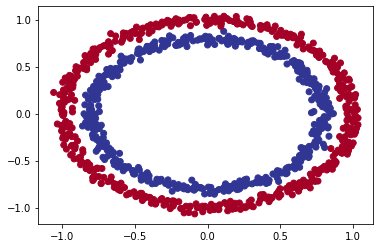

In [6]:
# Visualize 
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

**Note:**
The data we are working with is often referred to as toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [7]:
X.shape,y.shape 
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [8]:
# View the first example of feature and labels
X_sample=X[0]
y_sample=y[0]
print(f'Values of one sample of X:{X_sample} and the same for y:{y_sample}')
print(f'Shapes for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}')


Values of one sample of X:[0.75424625 0.23148074] and the same for y:1
Shapes for one sample of X:(2,) and the same for y:()


### Turning data into tensors and create train and test split

In [9]:
# Import data into tensors
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [10]:
X.dtype

torch.float32

In [11]:
torch.manual_seed(42)

In [12]:
# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,test_size=0.2,
                                               random_state=42)# 0.2 means 20 percent of the data will beused for testing


In [13]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 2. Building a model
let us build a model to classify our red and blue dots

To do so, we want to:
1. Setup the device agnostic code so our model run on acclerator(GPU )if there is one avilable
2. Construct the model(by subclassing nn.Module)
3. Defining a loss function and optimizer
4. Create the training and testing loop

In [14]:
# Import PyTorch and nn
import torch
from torch import nn

# Make a device agnostic code
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Now we have setup device agnostic code let us create a model that:

1. Subclasses `nn.Module`(almost all models in Pytorch subclasses it)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forward pass(or forward computation)
4. Instantiate an instnace of our model class and send it to the target `device`

In [15]:
from sklearn import datasets
# Constructing the model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create two nn.linear layer capable of handling our data
    self.layer_1=nn.Linear(in_features=2,
                           out_features=5)# takes in 2 features and upscale it to 5
    self.layer_2=nn.Linear(in_features=5,
                           out_features=1)# takes in 5 features and outputs 1
  # 3. Define the forward method that outlines the forward path        
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) # x-> layer 1 -> layer 2
# 4. Instantite an instance of our model and send it to our target device
model_0=CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_0.state_dict()

OrderedDict([('layer_1.weight', tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_1.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.2060], device='cuda:0'))])

In [17]:
device

'cuda'

In [18]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [19]:
# Lset us replicate the model above using nn.sequential
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
# Make some predictions
with torch.inference_mode():
  untrained_preds=model_0(X_test.to(device))
  print(f'length of untrained preds:{len(untrained_preds)},shape:{untrained_preds.shape}')
  print(f'length of test samples:{len(X_test)},Shape:{X_test.shape}')
  print(f'\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}')
  print(f'\nFirst 10 labels:\n{y_test[:10]}')

length of untrained preds:200,shape:torch.Size([200, 1])
length of test samples:200,Shape:torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


binary_cross_entropy_with_logits,
### 2.1 Setup loss function and optimizer

Which loss function or optimizer one should use incase of classification problems


Again this depends upon the problem one is facing


For regression we use mean absolute error
for classification we will use binary_cross_entropy

Below is the summary of these loss functions:

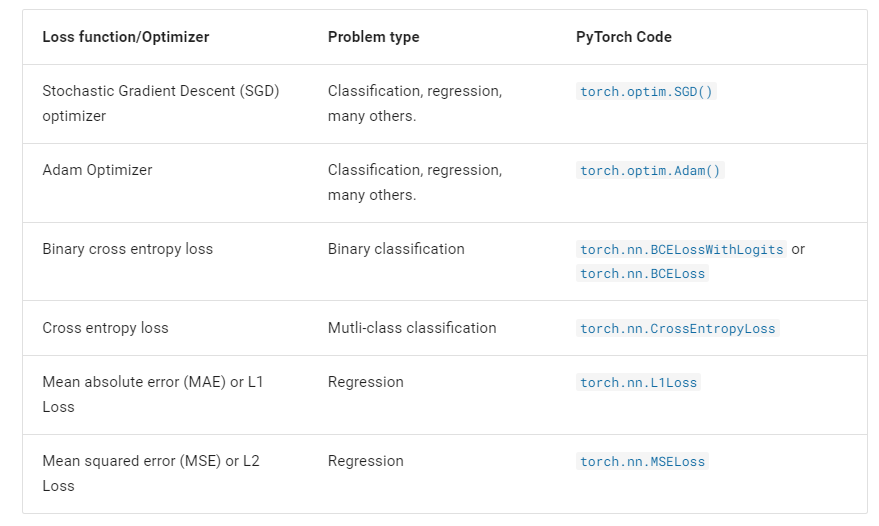


from pandas.core.reshape.merge import get_join_indexers
* For the loss function we are going to use `torch.nn.BECWithLogitsLoss()`,
* For the optimizer we are going to use `nn.optim.SGD` which is `schostic Gradient descent`


In [21]:
# Set up the loss function
loss_fn=nn.BCEWithLogitsLoss() # Built in sigmoid activation function
# Set up the optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [22]:
# Caluculate accuracy -out of 100 examples what percenatge does our model gets right
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc


## 3. Training Model
 To train our model we nedd to bulid our training Loop
  1. Forward pass
  2. Calculate the loss
  3. optimizer zero grad
  4. loss backward
  5. optimizer step(gradient descent)

### 3.1 Going from raw logits -> prediction probabilities-> prediction labels

Our model outputs are going to be **raw logits**.
 we cn convert these **logits** into prediction by passing them to some kind of activation function( that is for a binary classification problem we are going to use the sigmoid function and softmax for multiple classification)



Then we can convert our model  poredictions probabilities to prediction labels by either rounding them or taking them `argmax()`


In [23]:
# View the first 5 outputs of tha forward pass on thetest data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

For prediction probbalility values we need to perform a range-style rounding on them

* `y_pred_probs>=0.5, y=1(class 1)`
* `y_pred_probs<0.5, y=0(class 0)`

In [24]:
y_preds_probs=torch.round(torch.sigmoid(y_logits))
y_preds_probs


tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

### 3.2 Building a training and testing loop


In [25]:
# Training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# setting the number of epochs
epochs=100
# Put data on target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

# Building a training and evaluation loop
for epoch in range(epochs):
  ### Training 
  model_0.train()

  # 1. Forward pass
  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) # turn logits to pred probs into pred labels

  # 2. calculate the loss/accuracy
  loss=loss_fn(y_logits, # nn.BCELogitsLoss expects raw logits
               y_train)
  acc=accuracy_fn(y_true=y_train,
             y_pred=y_pred)
  # optimizer zero grad
  optimizer.zero_grad()
  # loss backward
  loss.backward()
  # optimizer step
  optimizer.step()
  ### testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits=model_0(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    # 2. calculate the loss
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)
    
    # print out wats happening
    if epoch%10==0:
      print(f'Epoch:{epoch}|loss:{loss:.5f},Train_acc={acc:.2f}%|test loss:{test_loss:.5f},Test acc:{test_acc}%')
  


Epoch:0|loss:0.69796,Train_acc=51.88%|test loss:0.69440,Test acc:57.99999999999999%
Epoch:10|loss:0.69590,Train_acc=51.25%|test loss:0.69305,Test acc:53.0%
Epoch:20|loss:0.69490,Train_acc=51.62%|test loss:0.69254,Test acc:49.5%
Epoch:30|loss:0.69435,Train_acc=51.12%|test loss:0.69236,Test acc:49.5%
Epoch:40|loss:0.69401,Train_acc=50.88%|test loss:0.69232,Test acc:51.0%
Epoch:50|loss:0.69378,Train_acc=50.25%|test loss:0.69234,Test acc:50.0%
Epoch:60|loss:0.69362,Train_acc=50.00%|test loss:0.69239,Test acc:51.5%
Epoch:70|loss:0.69351,Train_acc=50.25%|test loss:0.69246,Test acc:51.0%
Epoch:80|loss:0.69342,Train_acc=49.88%|test loss:0.69254,Test acc:50.0%
Epoch:90|loss:0.69336,Train_acc=49.88%|test loss:0.69262,Test acc:53.0%


## 4. let us make some predictions
from the metrics it lookslike our model is not learning let us make some predictions

To do so we are going to import a function called `plot_decision_boundary()`

In [26]:
import requests
from pathlib import Path
# Download helper functions from learn PyTorch repo
if Path('helper_functions.py').is_file():
  print('helper functions already exist, skipping download')
else:
  print('downloading thr helper_functions.py')
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py" )
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

downloading thr helper_functions.py


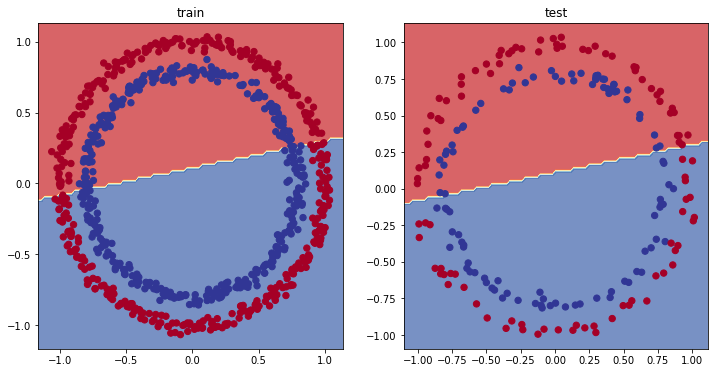

In [27]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_0,X_test,y_test)

## 5. Improving a model (from models perspective)

* Add more layers-give them more chances to learn
* Add more hidden units-go from 5 hidden units to 10 hidden units
* fitt for longer
* change the activation functions
* change theleaning rate
* Change the loss function

These options are from models practice rather than data

Moreover as one can see that all these options listed above can be set by us so these are refered to as **hyper-parameter**

Let us try to improve our model by:
* adding more hiddenunits
* Increasing the number of layers:
* increasing the number of times data passes through the model(or one can also say by increasing the number of epochs)

In [28]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    z=self.layer_3(self.layer_2(self.layer_1(x)))
    # The code as written in line above leverages speed
    return z
model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [29]:
# now our model is ready it is time setup a loss and optimizer function 
# as our model is neyral classification model we will be using nn.BCEWithLogitsLoss()
loss_fn=nn.BCEWithLogitsLoss()
# Now as describe earlier this loss function is helpul in a way that it has built in sigmmoid function
optimizer=torch.optim.Adam(params=model_1.parameters(),
                        lr=0.001)

In [30]:
# Writing a training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# making sure that all tha data is on the same device as the model
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

# setting up number of times the dat will pass throgh the model(epochs)
epochs=1000

# training loop
for epoch in range(epochs):
  model_1.train()
  # making a forward pass
  y_logits=model_1(X_train).squeeze()
  y_preds=torch.round(torch.sigmoid(y_logits))
  # Finding the cost(loss) function along with accuracy
  loss=loss_fn(y_logits,
               y_train)
  train_acc=accuracy_fn(y_true=y_train,
                       y_pred=y_pred)
  # performing zero grad
  optimizer.zero_grad()
  # performing back propogation
  loss.backward()
  # stepping up the optimizer
  optimizer.step()

  # testing
  model_1.eval()
  with torch.inference_mode():
    # Making the forward pass
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    # Finding the loss function
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)
    
    # Let us together look at the data
    if epoch%10==0:
      print(f'train loss:{loss} train accuracy:{train_acc}  test loss:{test_loss} test acc:{test_acc}')

  




train loss:0.6939550638198853 train accuracy:49.375  test loss:0.6926422119140625 test acc:50.0
train loss:0.6931232810020447 train accuracy:49.375  test loss:0.693492591381073 test acc:50.0
train loss:0.6929893493652344 train accuracy:49.375  test loss:0.694775402545929 test acc:45.5
train loss:0.6930030584335327 train accuracy:49.375  test loss:0.6953251957893372 test acc:45.5
train loss:0.6929852366447449 train accuracy:49.375  test loss:0.6949372887611389 test acc:45.5
train loss:0.6929807662963867 train accuracy:49.375  test loss:0.6945392489433289 test acc:45.0
train loss:0.6929811239242554 train accuracy:49.375  test loss:0.6945511698722839 test acc:46.0
train loss:0.6929798722267151 train accuracy:49.375  test loss:0.6946902275085449 test acc:45.0
train loss:0.6929800510406494 train accuracy:49.375  test loss:0.6947228312492371 test acc:45.5
train loss:0.6929798722267151 train accuracy:49.375  test loss:0.6946882605552673 test acc:46.0
train loss:0.6929798722267151 train accura

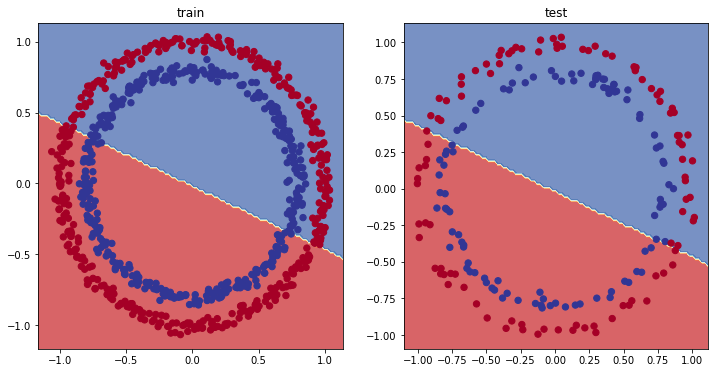

In [31]:
# plot the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_1,X_test,y_test)

### 5.1 Preparing data to see if our model can fit a straight line
one way to troubleshoot to a larger problem is to test out a smaller problem

In [32]:
# create some data
weight=0.7
bias=0.3
start=0
end=1
step=0.01

# create data
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias


In [33]:
# create train and test split
train_split=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]
len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression)


(80, 80, 20, 20)

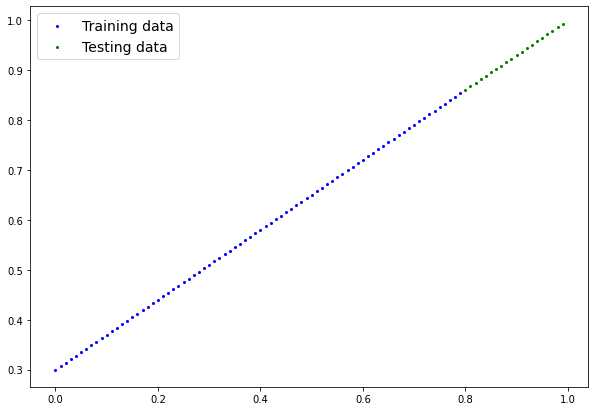

In [34]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [35]:
# same architecture as model_1
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [36]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.01)

In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# set up the number of epochs
epochs=1000
# put data on the same device
X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)
# training
for epoch in range(epochs):
  y_pred=model_2(X_train_regression)
  loss=loss_fn(y_pred,
               y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  # testing
  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred,y_test_regression)

  # print out whats happening
  if epoch%100==0:
    print(f'epoch:{epoch}|loss:{loss}|test_loss:{test_loss}')


epoch:0|loss:0.7598585486412048|test_loss:0.9110288619995117
epoch:100|loss:0.028579523786902428|test_loss:0.0008127063629217446
epoch:200|loss:0.02532539702951908|test_loss:0.0020921409595757723
epoch:300|loss:0.021374762058258057|test_loss:0.0030510127544403076
epoch:400|loss:0.01964486762881279|test_loss:0.003407776355743408
epoch:500|loss:0.019402215257287025|test_loss:0.0038725852500647306
epoch:600|loss:0.019032424315810204|test_loss:0.0037891955580562353
epoch:700|loss:0.018782908096909523|test_loss:0.003813472343608737
epoch:800|loss:0.018397415056824684|test_loss:0.0032875032629817724
epoch:900|loss:0.017980288714170456|test_loss:0.003603896591812372


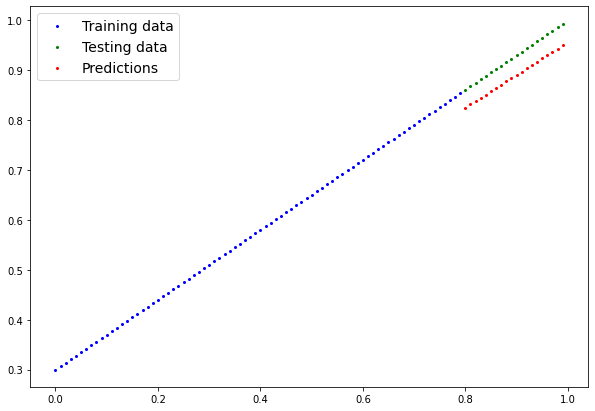

In [38]:
model_2.eval()
with torch.inference_mode():
  y_preds=model_2(X_test_regression)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. Missing piece: Non-Linearity

"What patterns could you draw if you were given an infinte amount of straight and non-straight lines?"
or in machine learning terms, an infinte amount of linear and non-linear functions

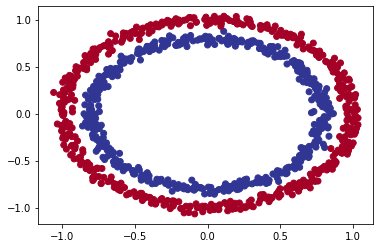

In [39]:
### 6.1 Recreating non-linear data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)
plt.scatter(x=X[:,0],y=X[:,1],c=y, cmap=plt.cm.RdYlBu) 

In [40]:
# convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split


# turn data init tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

# splitting th data
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)
X_train[:5],y_train[:5]
len(X_train),len(y_train)

(800, 800)

### let us build a model that is non_linear
* Linear:
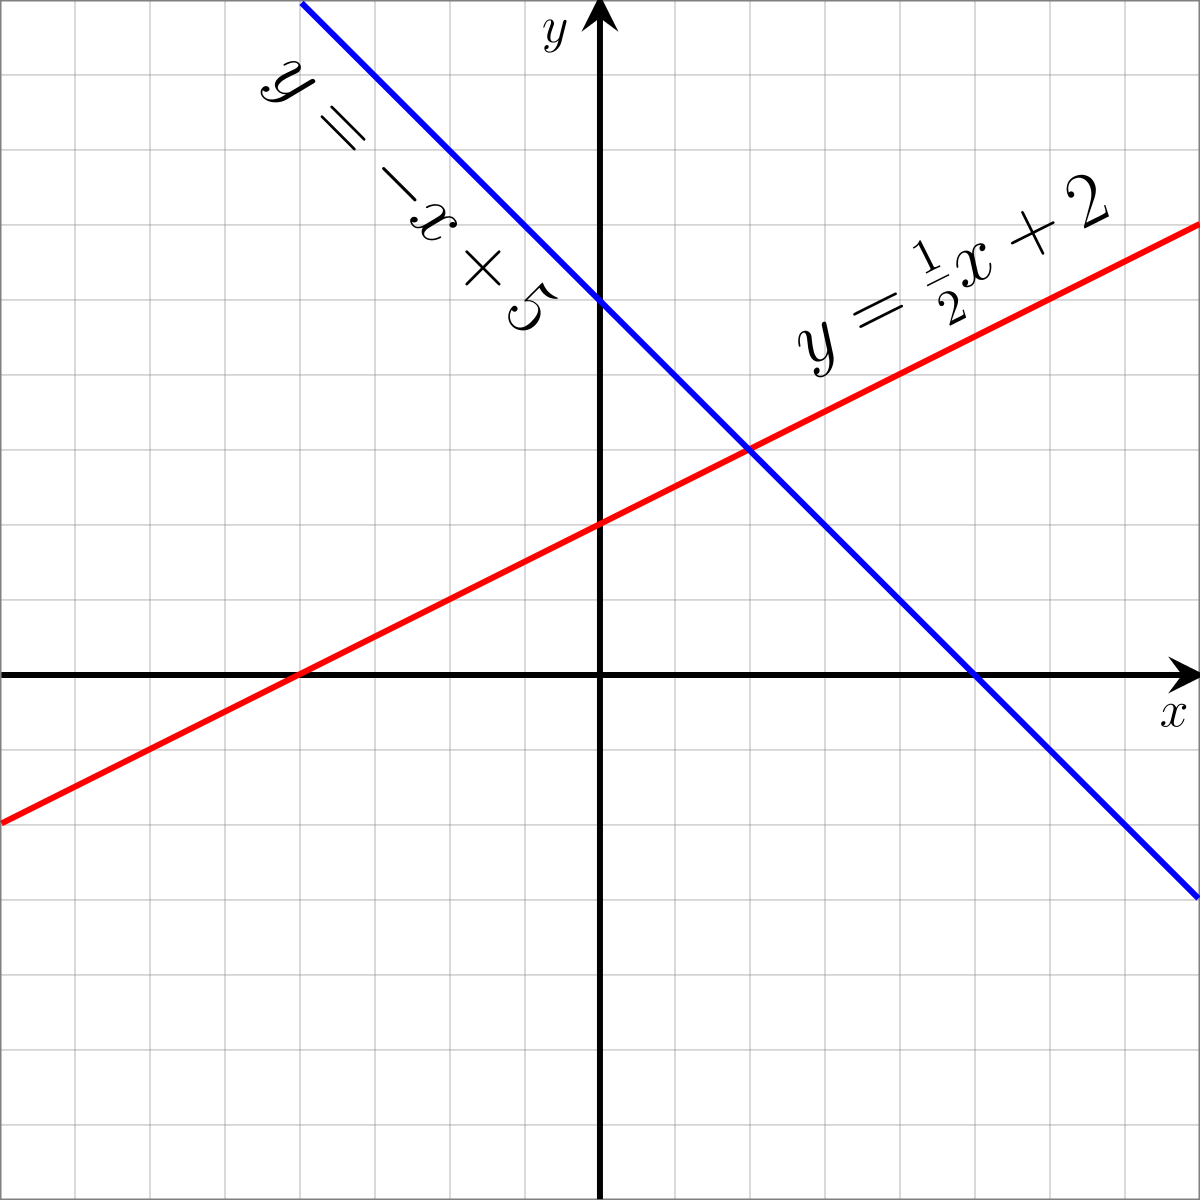
* Non-Linear: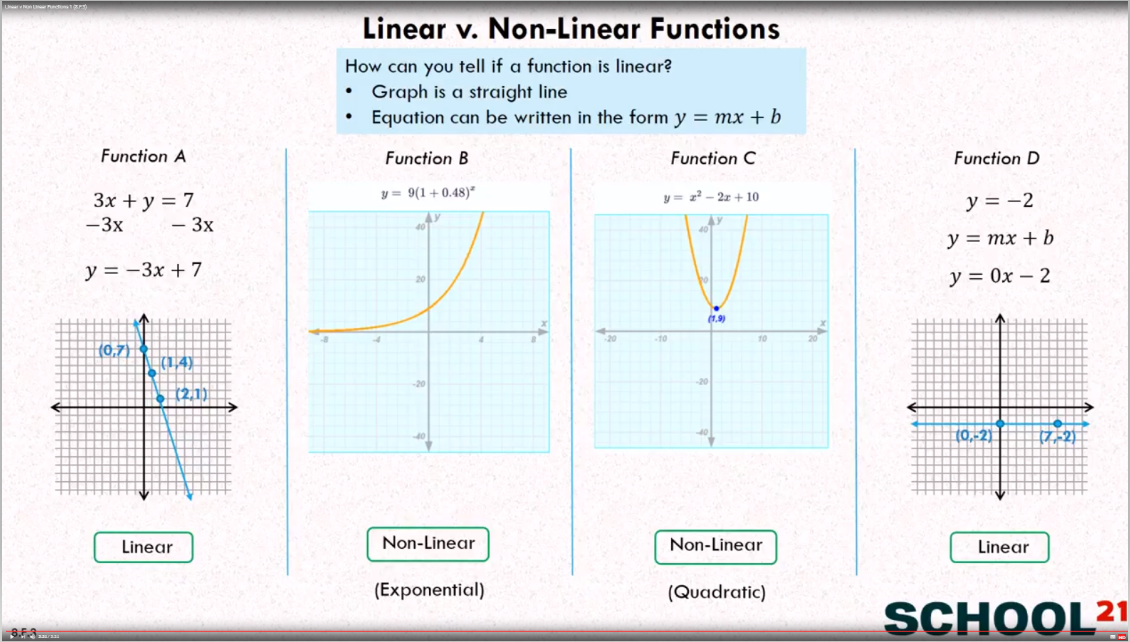


In [41]:
# Classificaton neural network with non-linearity
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    # where should we put our non-linear activation function
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
  
model_3=CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [42]:
# setting up the loss function and the optimizer
loss_fn=nn.BCEWithLogitsLoss()
# Optimizer
optimizer=torch.optim.Adam(params=model_3.parameters(),
                           lr=0.1)

In [43]:
# Training 
# setting seed for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# setting everything on the same device
X_test,y_test=X_test.to(device),y_test.to(device)
X_train,y_train=X_train.to(device),y_train.to(device)
#Setting up th number of times the data will go through the model
epochs=1000
# training loop
for epoch in range(epochs):
  model_3.train()
  #make a forward pass
  y_logits=model_3(X_train).squeeze()
  y_preds=torch.round(torch.sigmoid(y_logits))
  #caluclate the loss
  loss=loss_fn(y_logits,
               y_train)
  train_acc=accuracy_fn(y_true=y_train,
                        y_pred=y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #testing
  model_3.eval()
  with torch.inference_mode():
    y_test_preds_logits=model_3(X_test).squeeze()
    y_test_preds=torch.round(torch.sigmoid(y_test_preds_logits))
    test_loss=loss_fn(y_test_preds_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=y_test_preds)
    # let us see what is happening
    if epoch%100==0:
      print(f'Training loss:{loss} Training accuracy:{train_acc} Test loss:{test_loss} Test accuracy:{test_acc}')

    

Training loss:0.6929463148117065 Training accuracy:50.0 Test loss:0.6939401626586914 Test accuracy:50.0
Training loss:0.0016840682365000248 Training accuracy:100.0 Test loss:0.007436013780534267 Test accuracy:100.0
Training loss:0.0007127617718651891 Training accuracy:100.0 Test loss:0.005433613900095224 Test accuracy:100.0
Training loss:0.00041173072531819344 Training accuracy:100.0 Test loss:0.004930693190544844 Test accuracy:100.0
Training loss:0.0002592814853414893 Training accuracy:100.0 Test loss:0.005730441305786371 Test accuracy:100.0
Training loss:0.00017639655561652035 Training accuracy:100.0 Test loss:0.005162677727639675 Test accuracy:100.0
Training loss:0.00013070447312202305 Training accuracy:100.0 Test loss:0.005133709404617548 Test accuracy:100.0
Training loss:0.00010179512173635885 Training accuracy:100.0 Test loss:0.005340033210813999 Test accuracy:100.0
Training loss:8.194492693291977e-05 Training accuracy:100.0 Test loss:0.005600144620984793 Test accuracy:100.0
Trai

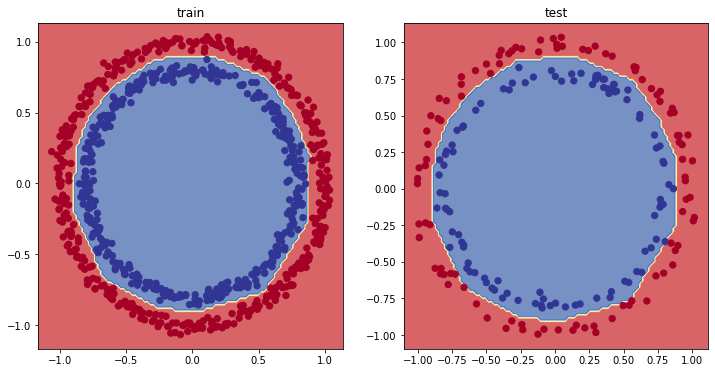

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_3,X_test,y_test)

## 7. Replicating non-Linear activation functions

Neural networks, rather than us telling the model what to learn, we  give it the tools to discover patterns in data and it tries to figure out the best patterns on its own


and these are linear and non-linear functions

In [45]:
# creating the tensor
A=torch.arange(-10,10,1,dtype=torch.float32)
A.dtype



torch.float32

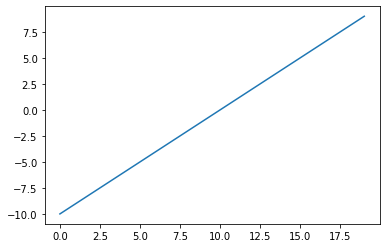

In [46]:
# let us visualize this data
plt.plot(A)

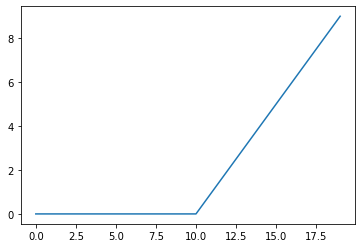

In [47]:
plt.plot(torch.relu(A))

In [48]:
def relu(x:torch.Tensor):
  return torch.maximum(torch.tensor(0),x)
relu(A)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

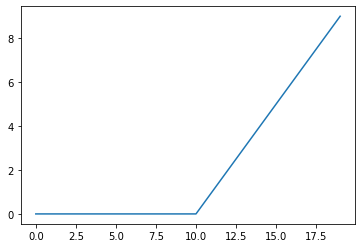

In [49]:
plt.plot(relu(A))

In [50]:
# let us do for sigmoid
def sigmoid(x):
  return 1/(1+torch.exp(-x))

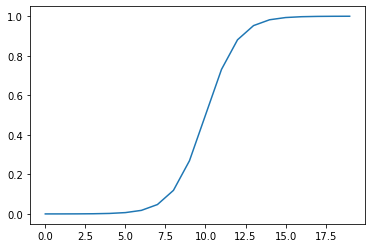

In [51]:
plt.plot(sigmoid(A))

## 8. putting it all together with multi-class classification problem
* Binary classification: cat vs dog
* Multi-class classification : more than onething or another

In [52]:
### 8.1 creating a toy datasets
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# set the yper parameters
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

# 1. make multi-class data
X_blob,y_blob=make_blobs(n_samples=1000,
                         n_features=NUM_FEATURES,
                         centers=NUM_CLASSES,
                         cluster_std=1.5,
                         random_state=RANDOM_SEED)
# 2. turn our data into tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. making split
X_blob_train, X_blob_test,y_blob_train,y_blob_test= train_test_split(X_blob,
                                                                     y_blob,
                                                                     test_size=0.2,
                                                                     random_state=RANDOM_SEED)
len(X_blob_train),len(X_blob_test),len(y_blob_train),len(y_blob_test)





(800, 200, 800, 200)

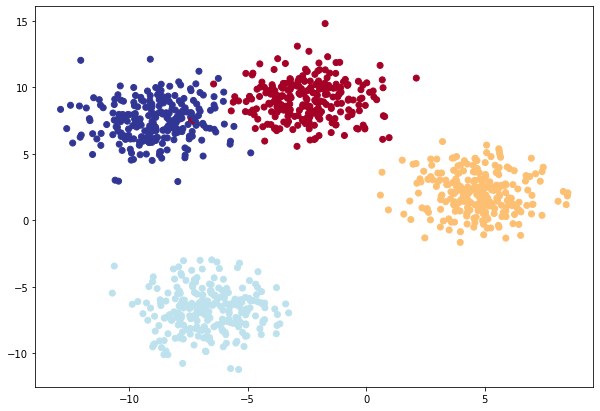

In [53]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

## 8.3 Creating a multi-class model


In [54]:
# creating device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [55]:
# multi-class classification model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """ Initialize multi-class classifiction model

    Args:
    input_features(int): Number of input features to the model
    output_features(int): Number of output-features
    hidden_units(int): number of hidden units,default=8
    
    """
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

# create an instance of BlobModel and send it to target device
model_4=BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

## 8.3  create loss function/optimizer

In [56]:
# loss function
loss_fn=nn.CrossEntropyLoss()# it also takes weight parameter when the training set is imbalanced
# optimizer
optimizer=torch.optim.Adam(params=model_4.parameters(),
                           lr=0.1)

### 8.4 getting predictions probbailities  

In [57]:
# let us get some raw outputs of our data
model_4.eval()
with torch.inference_mode():
  y_preds=model_4(X_blob_test.to(device))

y_preds[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [58]:
y_pred_probs=torch.softmax(y_preds,dim=1)
y_pred_probs[:10]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]], device='cuda:0')

In [59]:
# convert our model prediction probabilities to prediction table
y_preds =torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

### 8.5 Building a Training and Testing Loop

In [60]:
# setting up the seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# putting everything on the same device
X_blob_train,y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

# making the number of times data passes through the model
epochs=1000
for epoch in range(epochs):
  model_4.train()
  # forward pass
  y_logits=model_4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)
  # calculate the loss
  loss=loss_fn(y_logits,y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                       y_pred=y_pred)
  # performing zero grad
  optimizer.zero_grad()
  # loss backward (backward propogation)
  loss.backward()
  # step the optimizer
  optimizer.step()
  #testing
  model_4.eval()
  with torch.inference_mode():
    # make a forward pass
    test_logits=model_4(X_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)
    # calculate the loss
    test_loss=loss_fn(test_logits,y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,
                         y_pred=test_preds)
    # see what is happening
    if epoch%100==0:
      print(f'Epoch:{epoch} Training loss:{loss} Training Accuracy:{acc} Test Loss:{test_loss} Test Accuracy:{test_acc}')

Epoch:0 Training loss:1.1588265895843506 Training Accuracy:40.375 Test Loss:0.8166725039482117 Test Accuracy:68.5
Epoch:100 Training loss:0.01589096523821354 Training Accuracy:99.375 Test Loss:0.004211287945508957 Test Accuracy:100.0
Epoch:200 Training loss:0.014620952308177948 Training Accuracy:99.375 Test Loss:0.0025695026852190495 Test Accuracy:100.0
Epoch:300 Training loss:0.014003489166498184 Training Accuracy:99.5 Test Loss:0.0023574072401970625 Test Accuracy:100.0
Epoch:400 Training loss:0.013900445774197578 Training Accuracy:99.375 Test Loss:0.0021400456316769123 Test Accuracy:100.0
Epoch:500 Training loss:0.013783829286694527 Training Accuracy:99.375 Test Loss:0.0025938337203115225 Test Accuracy:100.0
Epoch:600 Training loss:0.013758969493210316 Training Accuracy:99.375 Test Loss:0.0022481123451143503 Test Accuracy:100.0
Epoch:700 Training loss:0.013752459548413754 Training Accuracy:99.375 Test Loss:0.0022786902263760567 Test Accuracy:100.0
Epoch:800 Training loss:0.0137307504

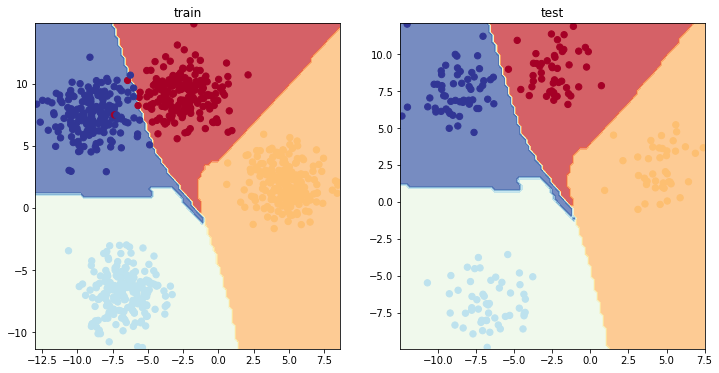

In [61]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

## 9. A few more classification metrics(to evaluate)
* accuracy- out of 100 how many our model gets write (one should use this metric to evaluate the model once one has balanced dataset otherwise not recommended)
* Precision
* Recall
* F1-score
* Confusion matrix
* classification report

these articles can help:

https://towardsdatascience.com/beyond-accuracy-other-classification-metrics-you-should-know-in-machine-learning-ea671be83bb7

https://willkoehrsen.github.io/statistics/learning/beyond-accuracy-precision-and-recall/

In [62]:
!pip install torchmetrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 10.9 MB/s eta 0:00:00


In [70]:
from torchmetrics import Accuracy

#setup metric
torchmetric_accuracy= Accuracy(task="multiclass", num_classes=4).to(device)# always remember to transfer the class to our target device to not get a device error
# Moreover it is necessary to give the argumnets of task and num_classes to your Accuracy class depending upon binary andmulti class classification

# calculate accuracy
torchmetric_accuracy(y_pred,y_blob_train)


tensor(0.9937, device='cuda:0')